In [1]:
# Importe les librairies nécessaires à notre projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re
import pycountry

# On récupère la liste des codes des pays sur 3 caractères.
# Correspond à notre 'Country Code' / 'CountryCode'
# si nécessaire, remplacer alpha_3 par name.
pays = [p.alpha_3 for p in pycountry.countries]

PATH_EdStatsCountry = 'C:/Users/20100/Desktop/Data Engineer/Projet 02/02 - Exercice/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv'
PATH_EdStatsCountry_Series = 'C:/Users/20100/Desktop/Data Engineer/Projet 02/02 - Exercice/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv'
PATH_EdStatsData = 'C:/Users/20100/Desktop/Data Engineer/Projet 02/02 - Exercice/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv'
PATH_EdStatsFootNote = 'C:/Users/20100/Desktop/Data Engineer/Projet 02/02 - Exercice/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv'
PATH_EdStatsSeries = 'C:/Users/20100/Desktop/Data Engineer/Projet 02/02 - Exercice/Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv'

def SimpleInfos(PATH_fichier):
    data_pays_valides = None
    prop_manquant_data_pays_valides = None
    
    data = pd.read_csv(PATH_fichier)

    # Supprime la douleur colonne de chaque dataframe
    data = data.drop(data.columns[-1], axis=1)

    # Pour chaque dataframe contenant les pays, on ne prend que les pays reconnus et on enlève les zones géographiques
    if 'Country Code' in data.columns:
        data_pays_valides = data[data['Country Code'].isin(pays)]
    elif 'CountryCode' in data.columns:
        data_pays_valides = data[data['CountryCode'].isin(pays)]
    else:
        # aucune des deux colonnes n'existe → on prend tout le DataFrame
        data_pays_valides = data
    
    # Permet de prendre connaissance des informations du dataframe
    print('-------------------- Info du DataFrame ---------------------------')
    data_pays_valides.info()
    
    # Permet de voir les 5 premières lignes du dataframe avec les noms des colonnes
    print('\n-------------------- 5 premières lignes ---------------------------')
    print(data_pays_valides.head())
    
    # Permet de connaître le nom de lignes et de colonnes du dataframe
    print('\n-------------------- Dimension du DataFrame ---------------------------')
    print(data_pays_valides.shape)
    
    # Permet de voir s'il y a des doublons et les affiche.
    duplicates_data_pays_valides = data_pays_valides[data_pays_valides.duplicated()]
    print('\n-------------------- Doublons ---------------------------')
    print(duplicates_data_pays_valides)

    # Calcule le pourcentage de données manquantes par colonne
    prop_manquant_data_pays_valides = data_pays_valides.isnull().sum() / len(data_pays_valides) * 100
    # Affiche les colonnes avec leurs pourcentages de données manquantes
    print('\n-------------------- % de valeurs manquantes par colonne ---------------------------')
    print(prop_manquant_data_pays_valides)

    # Permet d'avoir des éléments de base sur les colonnes numériques
    print('\n-------------------- Statistiques descriptives ---------------------------')
    print(data_pays_valides.describe())

    # Affiche par colonne de type object le nom d'occurrence dans le dataframe
    print('\n-------------------- Occurrences par colonne object ---------------------------')
    for col in data_pays_valides.select_dtypes(include='object').columns:
        print(f"\nColonne : {col}")
        print(data_pays_valides.groupby(col).size())

    return data_pays_valides

# Lit les fichiers csv
print('\n-------------------- Fichier EdStatsCountry ---------------------------')
data_country = SimpleInfos(PATH_EdStatsCountry)
print('\n-------------------- Fichier EdStatsCountry_Series ---------------------------')
data_country_series = SimpleInfos(PATH_EdStatsCountry_Series)
print('\n-------------------- Fichier EdStatsData ---------------------------')
data_data = SimpleInfos(PATH_EdStatsData)
print('\n-------------------- Fichier EdStatsFootNote ---------------------------')
data_foot = SimpleInfos(PATH_EdStatsFootNote)
print('\n-------------------- Fichier EdStatsSeries ---------------------------')
data_series = SimpleInfos(PATH_EdStatsSeries)


-------------------- Fichier EdStatsCountry ---------------------------
-------------------- Info du DataFrame ---------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       214 non-null    object 
 1   Short Name                                         214 non-null    object 
 2   Table Name                                         214 non-null    object 
 3   Long Name                                          214 non-null    object 
 4   2-alpha code                                       213 non-null    object 
 5   Currency Unit                                      213 non-null    object 
 6   Special Notes                                      119 non-null    object 
 7   Region                             

In [2]:
def TauxRemplissageDataDF(data):
    fill_rate_per_column = None
    fill_rate_mean = None
    
    fill_rate_per_column = data.notna().sum() / len(data)
    print(fill_rate_per_column * 100)
    
    print ('------------------------------------')
    fill_rate_mean = fill_rate_per_column.mean()
    print(f"Taux moyen de remplissage du DataFrame : {fill_rate_mean * 100:.2f}%")

In [3]:
print('\n-------------------- Taux de Remplissage du fichier EdStatsCountry ---------------------------')
TauxRemplissageDataDF(data_country)
print('\n-------------------- Taux de Remplissage du fichier EdStatsCountry_Series ---------------------------')
TauxRemplissageDataDF(data_country_series)
print('\n-------------------- Taux de Remplissage du fichier EdStatsData ---------------------------')
TauxRemplissageDataDF(data_data)
print('\n-------------------- Taux de Remplissage du fichier EdStatsFootNote ---------------------------')
TauxRemplissageDataDF(data_foot)
print('\n-------------------- Taux de Remplissage du fichier EdStatsSeries ---------------------------')
TauxRemplissageDataDF(data_series)


-------------------- Taux de Remplissage du fichier EdStatsCountry ---------------------------
Country Code                                         100.000000
Short Name                                           100.000000
Table Name                                           100.000000
Long Name                                            100.000000
2-alpha code                                          99.532710
Currency Unit                                         99.532710
Special Notes                                         55.607477
Region                                                99.065421
Income Group                                          99.065421
WB-2 code                                             99.532710
National accounts base year                           94.859813
National accounts reference year                      14.485981
SNA price valuation                                   91.121495
Lending category                                      66.822430
Other gr

In [4]:
def GraphGroupRevenus(data):
    data_graph = data.copy()
    # Définit une catégorie pour des pays dont le groupe de revenus n'est pas renseigné
    data_graph['Income Group'] = data_graph['Income Group'].fillna('Non défini')
    
    # Compte le nombre de pays uniques par groupe de revenus 
    data_ig_sn = data_graph.groupby('Income Group')['Short Name'].nunique()
    income_counts = data_ig_sn.sort_values(ascending=False)
    
    # Indique la taille du graphique
    plt.figure(figsize=(10,6))
    
    # Crée le graphique en barres
    sns.barplot(
        x=income_counts.values,
        y=income_counts.index,
        hue=income_counts.index,      # permet d'avoir une couleur par ligne
        palette="cubehelix"
    )
    # Indique les labels et le titre du graphique
    plt.xlabel('Nombre de pays')
    plt.ylabel('Groupes de Revenus')
    plt.title('Nombre de Pays par Groupe de Revenus')
    plt.show()

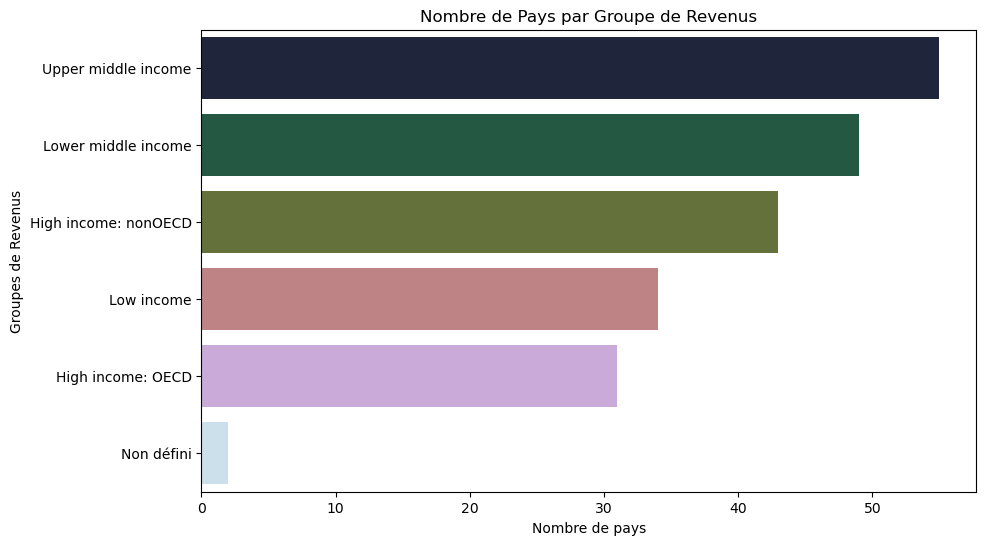

In [6]:
GraphGroupRevenus(data_country)

In [7]:
def GraphIndicatorsPays(data):
    data_sc_cc = None 
    
    # Compte le nombre de pays uniques par code indicateur 
    data_sc_cc = data.groupby('SeriesCode')['CountryCode'].nunique()
    seriescode_counts = data_sc_cc.sort_values(ascending=False)
    
    # Indique la taille du graphique
    plt.figure(figsize=(10,6))
    
    # Crée le graphique en barres
    sns.barplot(
        x=seriescode_counts.values,
        y=seriescode_counts.index,
        hue=seriescode_counts.index,      # on met l'index en "hue"
        palette="cubehelix"
    )
    # Indique les labels et le titre du graphique
    plt.xlabel('Nombre de pays')
    plt.ylabel('Codes Indicateurs')
    plt.title('Nombre de Pays par Code Indicateur')
    plt.show()

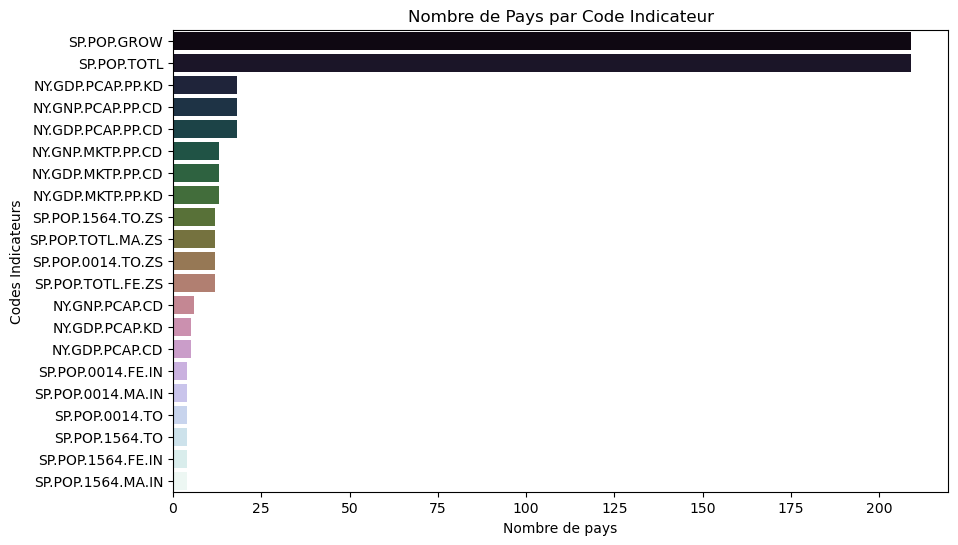

In [8]:
GraphIndicatorsPays(data_country_series)

In [9]:
def DatasParYear(data):
    # Calcul le nombre de données par année 
    if any(col.isdigit() for col in data.columns):
        data_years = data.select_dtypes(include='float64')
        data_years_presents = data_years.notnull().sum()
    else:
        data_years_presents = (data_foot['Year'].str[2:].astype(int).value_counts().sort_index())
    
    # Indique la taille du graphique
    plt.figure(figsize=(15,10))
    
    # Crée le graphique en barres
    sns.barplot(
        x=data_years_presents.index,
        y=data_years_presents.values,
        color='lightblue'
    )
    # Tourne les labels des abscisses pour plus de lisibilité
    plt.xticks(rotation=90)
    
    # Indique les labels et le titre du graphique
    plt.xlabel('')
    plt.ylabel('Nombre de données')
    plt.title('Nombre de données par année')
    plt.show()

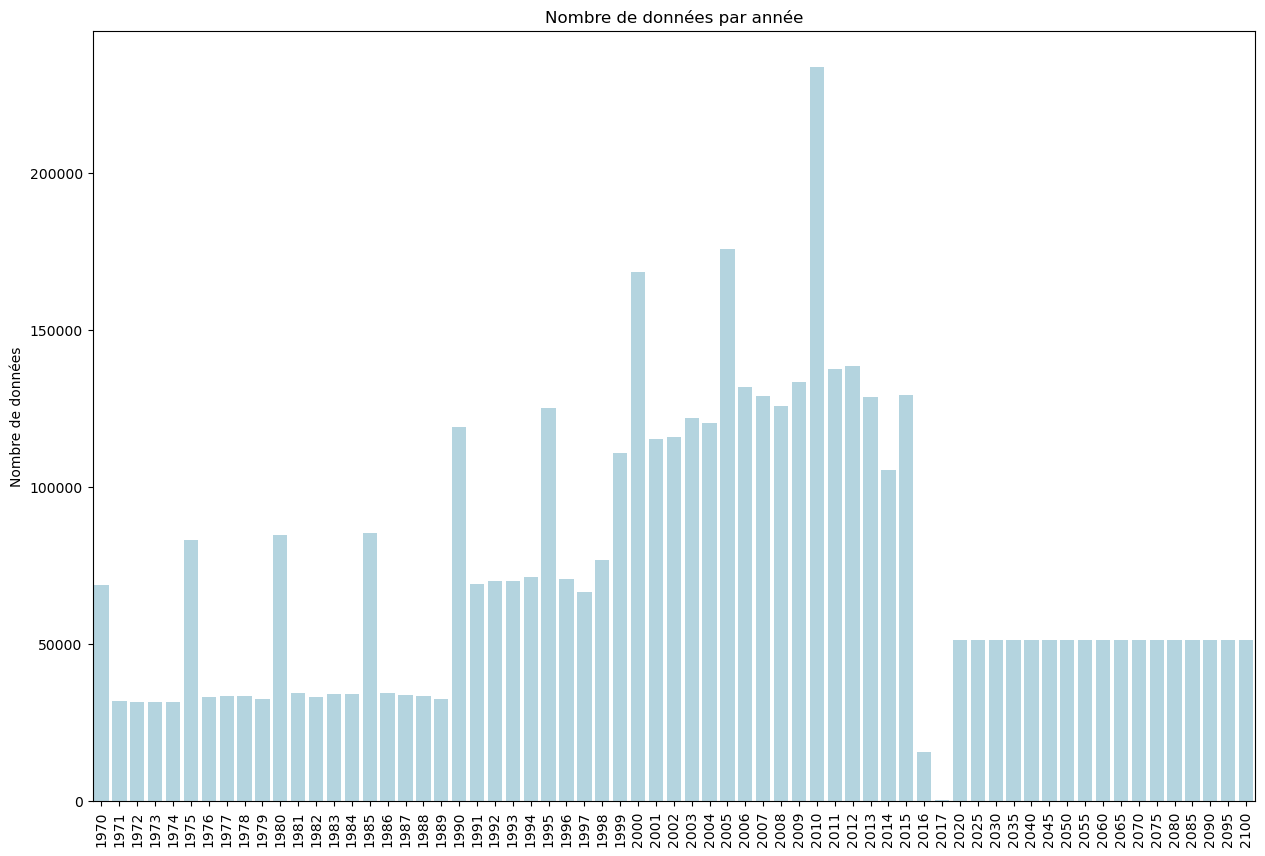

In [10]:
DatasParYear(data_data)

In [11]:
def PresentDatas(data):
    # On sélectionne uniquement les colonnes d'années
    columns_year = data.select_dtypes(include='float64').columns
    
    # Calcul du % de valeurs présentes et manquantes par année
    pourcent_present = data[columns_year].notnull().mean() * 100
    pourcent_manquant = 100 - pourcent_present
    
    # Mettre dans un DataFrame pour plus de lisibilité
    df_pourcentdata = pd.DataFrame({
        "Présentes": pourcent_present,
        "Absentes": pourcent_manquant
    })
    
    # Création du graphique 
    plt.figure(figsize=(14,6))
    plt.bar(df_pourcentdata.index, df_pourcentdata['Présentes'], label='Présentes', color='lightblue')
    plt.bar(df_pourcentdata.index, df_pourcentdata['Absentes'], bottom=df_pourcentdata['Présentes'], 
            label='Absentes', color='lightsalmon')
    
    # Mise en forme
    plt.xticks(rotation=90)
    plt.ylabel('Proportion (%)')
    plt.xlabel('')
    plt.title('Présence des données par année')
    plt.legend()
    plt.tight_layout()
    plt.show()

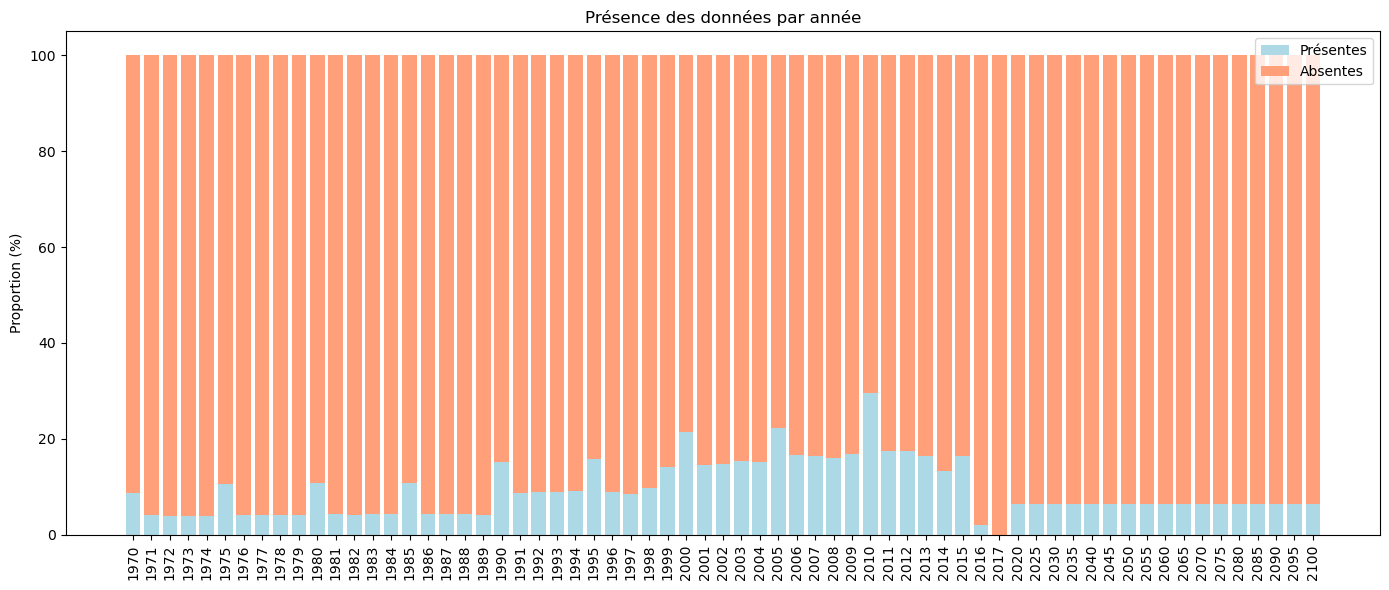

In [13]:
PresentDatas(data_data)

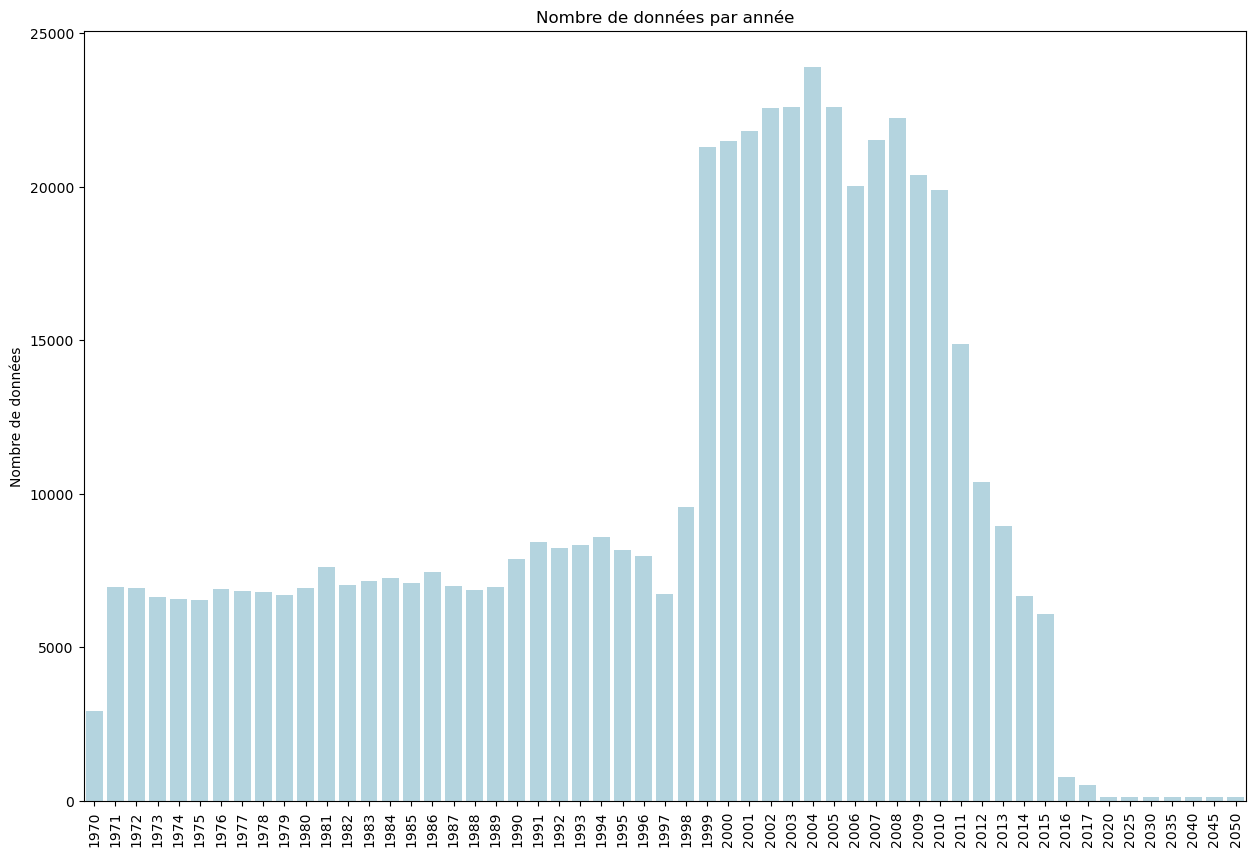

In [14]:
DatasParYear(data_foot)

In [17]:
# Restreint aux colonnes des années 2005 à 2015
annees_20052015 = [col for col in data_data.columns if col.isdigit() and 2005 <= int(col) < 2016]

def TauxRemplissageIndicators(data, categindic=None, top=20):
    taux_remplissage = None
    indic_names = None
    
    if(categindic is not None):
        data_categ = data[data['Indicator Code'].str.split('.').str[0] == categindic]
    else:
        data_categ = data
    
    # Calcule le taux de remplissage par indicateur
    taux_remplissage = (
        data_categ.groupby('Indicator Code')[annees_20052015]
        .apply(lambda g: g.notna().sum().sum() / g.size * 100)   # valeurs non nulles / total
        .reset_index(name='Taux de Remplissage (en %)')
        .sort_values('Taux de Remplissage (en %)', ascending=False)
    )
    
    # Ajoute les noms des indicateurs pour plus de lisibilité
    indic_names = data_categ[['Indicator Code', 'Indicator Name']].drop_duplicates()
    taux_remplissage = taux_remplissage.merge(indic_names, on='Indicator Code', how='left')
    
    # Affiche avec pourcentages
    print(taux_remplissage.head(top).to_string(index=False, formatters={'Taux de Remplissage (%)': '{:.2f}%'.format}))


def TauxRemplissageFamilleIndicators(data):
    taux_remplissage_famille = None
    data_family = data.copy()
    
    # Extrait le préfixe (famille d’indicateur : SP, SE, IT, UIS, etc.)
    data_family["Indicator Family"] = data_family["Indicator Code"].str.split(".").str[0]
    
    # Calcule le taux de remplissage par famille d’indicateurs
    taux_remplissage_famille = (
        data_family.groupby("Indicator Family")[annees_20052015]
        .apply(lambda g: g.notna().sum().sum() / g.size * 100)   # valeurs non nulles / total
        .reset_index(name='Taux de Remplissage (en %)')
        .sort_values('Taux de Remplissage (en %)', ascending=False)
    )
    
    # Affiche avec pourcentages
    print(taux_remplissage_famille.to_string(index=False, formatters={'Taux de Remplissage (%)': '{:.2f}%'.format}))

In [18]:
TauxRemplissageIndicators(data_data)

   Indicator Code  Taux de Remplissage (en %)                                                                    Indicator Name
      SP.POP.TOTL                   98.562368                                                                 Population, total
      SP.POP.GROW                   98.520085                                                      Population growth (annual %)
      SE.PRM.DURS                   96.744186                                 Theoretical duration of primary education (years)
      SE.PRM.AGES                   96.744186                                Official entrance age to primary education (years)
      UIS.THDUR.0                   95.348837                             Theoretical duration of pre-primary education (years)
      SE.SEC.DURS                   95.264271                               Theoretical duration of secondary education (years)
   SE.SEC.DURS.UP                   95.264271                         Theoretical duration of upper seco

In [19]:
TauxRemplissageFamilleIndicators(data_data)

Indicator Family  Taux de Remplissage (en %)
              NY                   88.868922
              SP                   83.794484
              SH                   75.179704
              IT                   54.186047
              SE                   49.206760
              SL                   40.835717
            XGDP                   34.016913
             UIS                   24.902763
             PRJ                   14.037506
             BAR                   12.177590
            OECD                   11.326638
              HH                    2.758224
              LO                    1.840779
           SABER                    0.549683


In [20]:
print('\n-------------------- Indicateur NY ---------------------------')
TauxRemplissageIndicators(data_data,'NY', 15)
print('\n-------------------- Indicateur SP ---------------------------')
TauxRemplissageIndicators(data_data,'SP', 15)
print('\n-------------------- Indicateur SH ---------------------------')
TauxRemplissageIndicators(data_data,'SH', 15)
print('\n-------------------- Indicateur IT ---------------------------')
TauxRemplissageIndicators(data_data,'IT', 15)
print('\n-------------------- Indicateur SE ---------------------------')
TauxRemplissageIndicators(data_data,'SE', 15)


-------------------- Indicateur NY ---------------------------
   Indicator Code  Taux de Remplissage (en %)                                      Indicator Name
   NY.GDP.MKTP.CD                   93.107822                  GDP at market prices (current US$)
   NY.GDP.PCAP.CD                   93.107822                        GDP per capita (current US$)
   NY.GDP.PCAP.KD                   91.247357                  GDP per capita (constant 2005 US$)
   NY.GDP.MKTP.KD                   91.247357            GDP at market prices (constant 2005 US$)
   NY.GNP.MKTP.CD                   88.752643                                   GNI (current US$)
   NY.GNP.PCAP.CD                   87.780127          GNI per capita, Atlas method (current US$)
NY.GDP.MKTP.PP.KD                   87.230444            GDP, PPP (constant 2011 international $)
NY.GDP.MKTP.PP.CD                   87.230444                  GDP, PPP (current international $)
NY.GDP.PCAP.PP.KD                   87.230444 GDP per 

In [21]:
categories_top = ['SP','SE','IT','NY']
data_country_series_selected = data_country_series[data_country_series['SeriesCode'].str.split('.').str[0].isin(categories_top)]
data_data_selected = data_data[data_data['Indicator Code'].str.split('.').str[0].isin(categories_top)]
data_foot_selected = data_foot[data_foot['SeriesCode'].str.split('.').str[0].isin(categories_top)]
data_series_selected = data_series[data_series['Series Code'].str.split('.').str[0].isin(categories_top)]

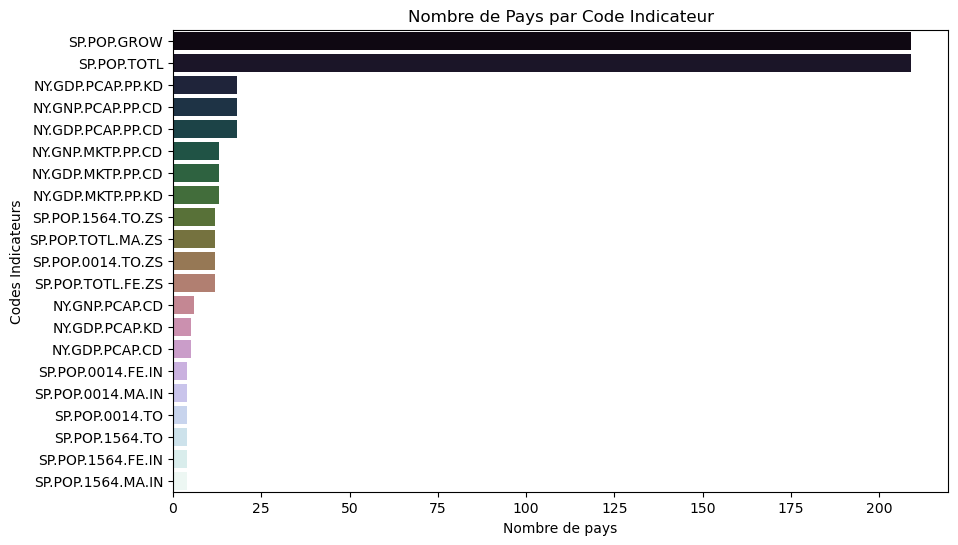

In [22]:
GraphIndicatorsPays(data_country_series_selected)

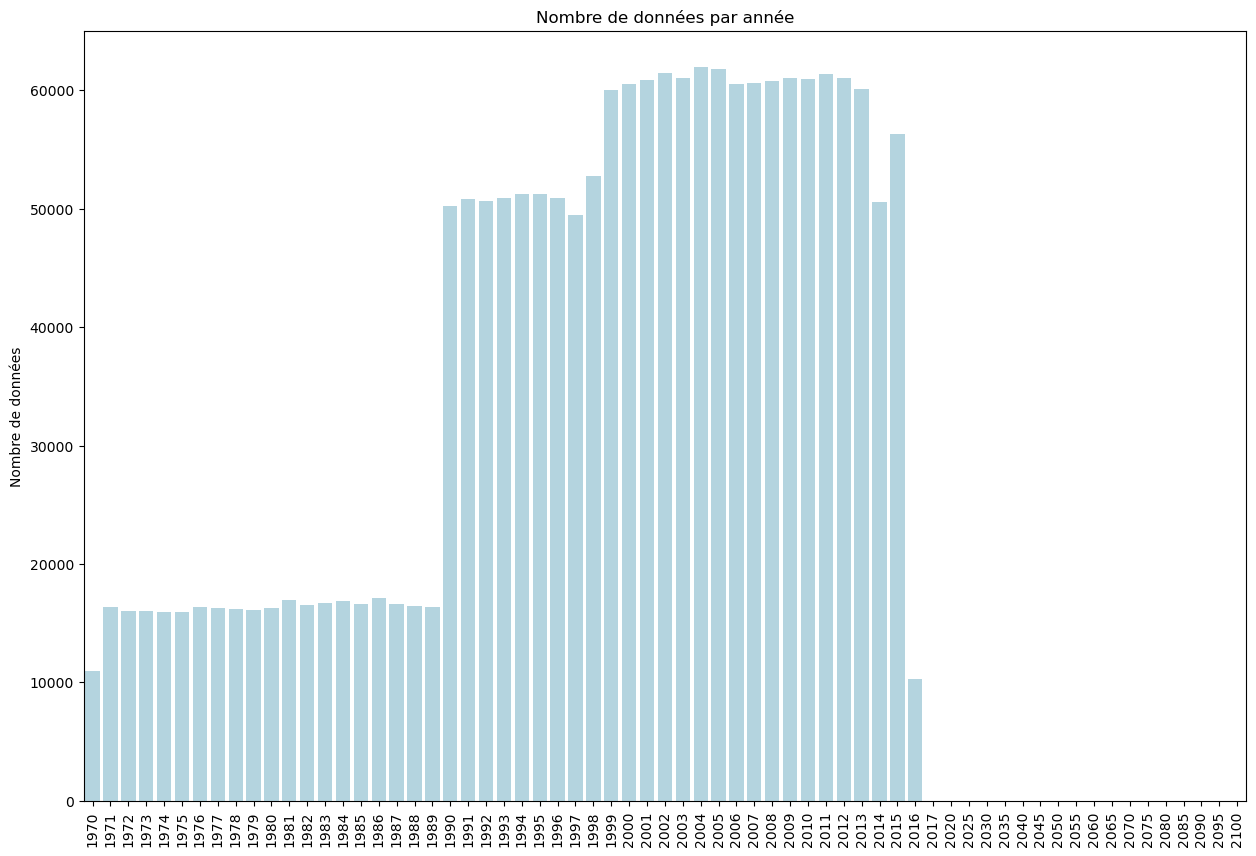

In [23]:
DatasParYear(data_data_selected)

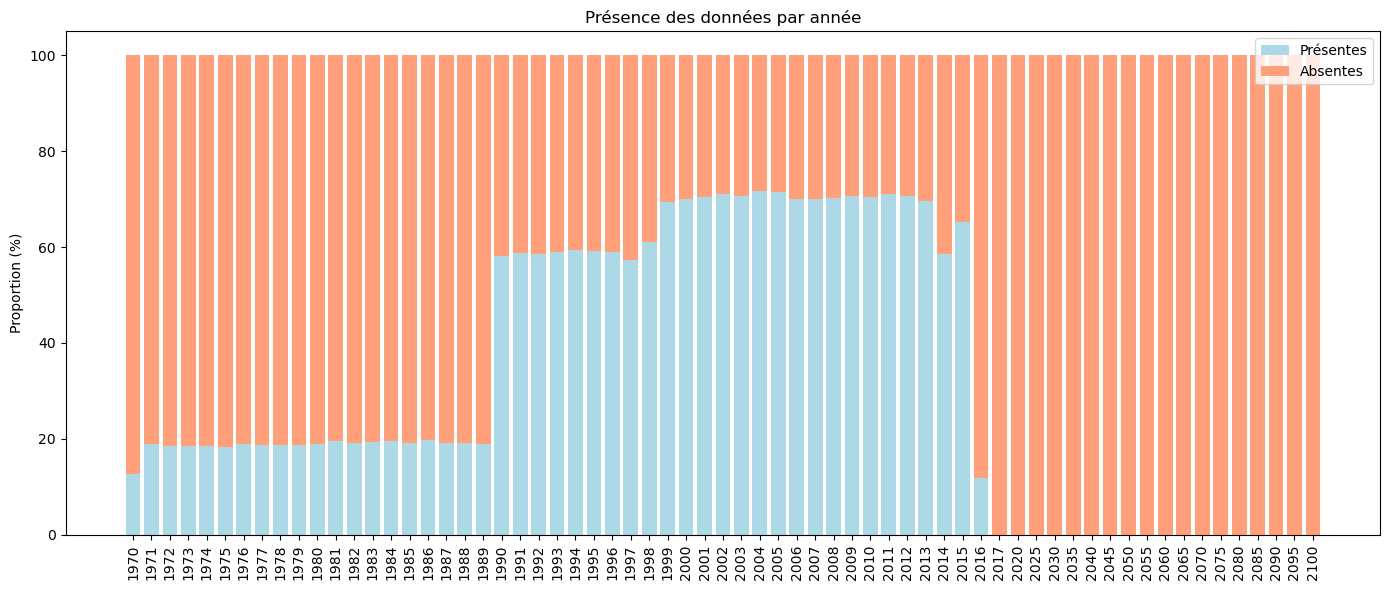

In [24]:
PresentDatas(data_data_selected)

In [31]:
def CompareDatasYear(data1, data2, labels=('Dataset 1', 'Dataset 2')):
    # Calculs pour dataset 1
    if any(col.isdigit() for col in data1.columns):
        data1_years = data1.select_dtypes(include='float64').notnull().sum()
    else:
        data1_years = data_foot['Year'].str[2:].astype(int).value_counts().sort_index()
    
    # Calculs pour dataset 2
    if any(col.isdigit() for col in data2.columns):
        data2_years = data2.select_dtypes(include='float64').notnull().sum()
    else:
        data2_years = data_foot['Year'].str[2:].astype(int).value_counts().sort_index()
    
    # Fusion en DataFrame
    df_compare = pd.DataFrame({labels[0]: data1_years, labels[1]: data2_years})
    
    # Plot
    df_compare.plot(kind='bar', figsize=(14,6))
    plt.xticks(rotation=90)
    plt.ylabel('Nombre de données')
    plt.title('Comparaison du nombre de données par année')
    plt.show()


def ComparePresentData(df1, df2, label1='Dataset 1', label2='Dataset 2'):   
    # Identifier les colonnes années (noms numériques uniquement)
    years1 = [col for col in df1.columns if str(col).isdigit()]
    years2 = [col for col in df2.columns if str(col).isdigit()]
    years = sorted(set(map(int, years1)).union(map(int, years2)))
    
    # Calcul des % présents
    p1 = df1[[str(y) for y in years if str(y) in df1.columns]].notna().mean() * 100
    p2 = df2[[str(y) for y in years if str(y) in df2.columns]].notna().mean() * 100
    
    # Réindexer sur l'union des années (manquantes = 0%)
    p1 = p1.reindex([str(y) for y in years], fill_value=0)
    p2 = p2.reindex([str(y) for y in years], fill_value=0)
    
    # Construction DataFrame long pour seaborn
    df_long = pd.DataFrame({
        'Année': list(p1.index) * 2,
        'Présence (%)': list(p1.values) + list(p2.values),
        'Dataset': [label1] * len(p1) + [label2] * len(p2)
    })
    
    # Graphique comparatif
    plt.figure(figsize=(14,6))
    sns.barplot(data=df_long, x='Année', y='Présence (%)', hue='Dataset')
    plt.xticks(rotation=90)
    plt.title(f"Présence des données par année ({label1} vs {label2})")
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

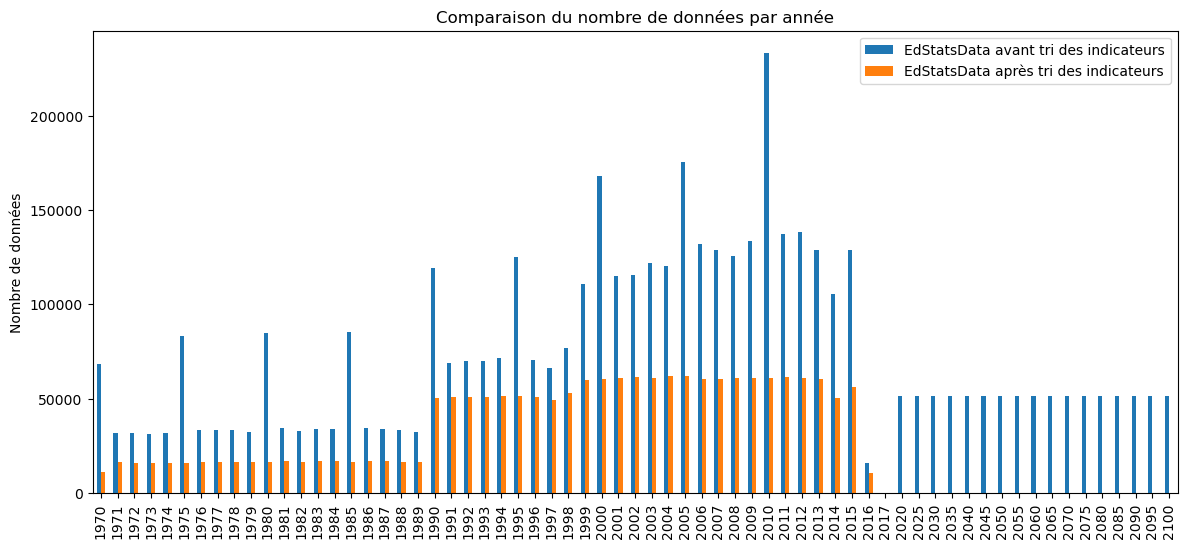

In [32]:
CompareDatasYear(data_data, data_data_selected, labels=('EdStatsData avant tri des indicateurs', 'EdStatsData après tri des indicateurs'))

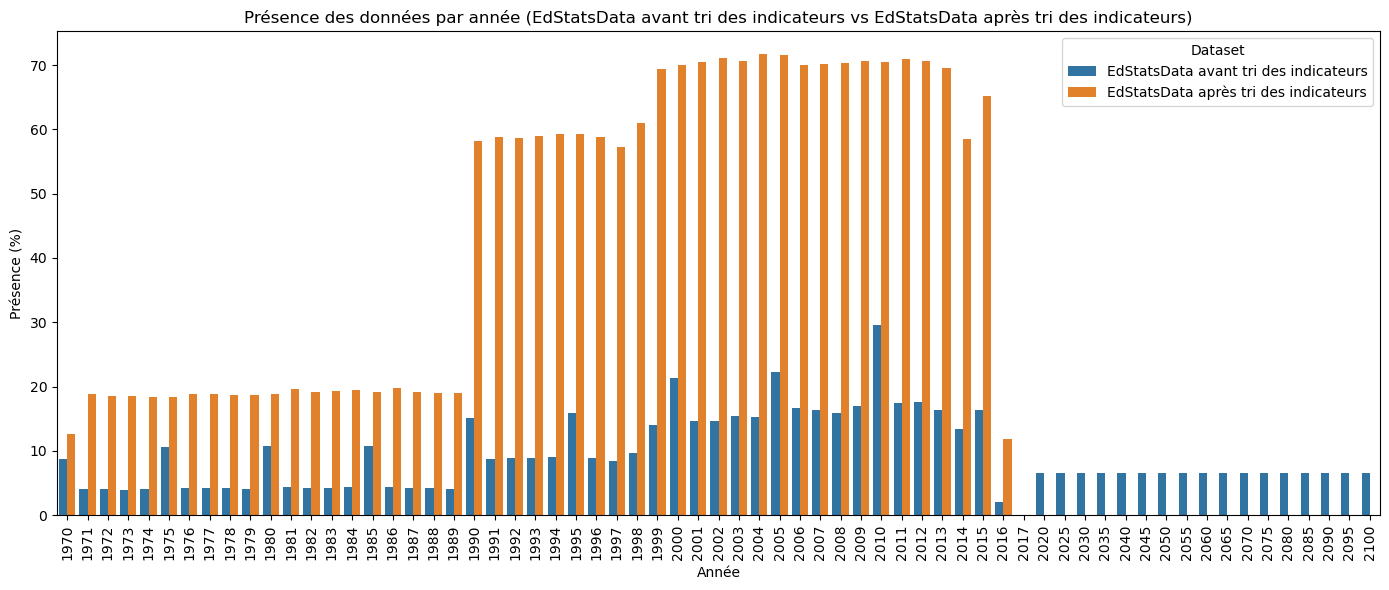

In [33]:
ComparePresentData(data_data, data_data_selected, 'EdStatsData avant tri des indicateurs', 'EdStatsData après tri des indicateurs')

In [35]:
# MERGE EDSTATSDATA avec EDSTATSCOUNTRY

data_data_selected_copy = data_data_selected.copy()

# Supprime les colonnes vides (toutes les valeurs NaN)
data_data_selected_copy = data_data_selected_copy.dropna(axis=1, how='all')

# Identifie les colonnes numériques (les années)
colonnes_annees = data_data_selected_copy.select_dtypes(include=['float64']).columns

# Compte le nombre de valeurs non nulles par année
nb_reponses = data_data_selected_copy[colonnes_annees].notnull().sum()

# Reconstruit le DataFrame filtré
colonnes_a_garder = ['Country Code', 'Indicator Name', 'Indicator Code'] + list(annees_20052015)
data_data_selected_copy = data_data_selected_copy[colonnes_a_garder]

data_merge = data_data_selected_copy.merge(data_country, how='inner', on='Country Code')

In [36]:
liste_codeindicator= ['SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 
                      'NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 
                      'SE.TER.ENRR', 'NY.GDP.MKTP.PP.CD', 'SP.POP.GROW',
                     ]
 
data_merge_listeindic = data_merge[data_merge["Indicator Code"].isin(liste_codeindicator)]

In [37]:
exclude_income_groups = ['Low income', 'Lower middle income', 'Upper middle income']

# Filtrage
data_merge_liste_income = data_merge_listeindic[~data_merge_listeindic['Income Group'].isin(exclude_income_groups)].copy()

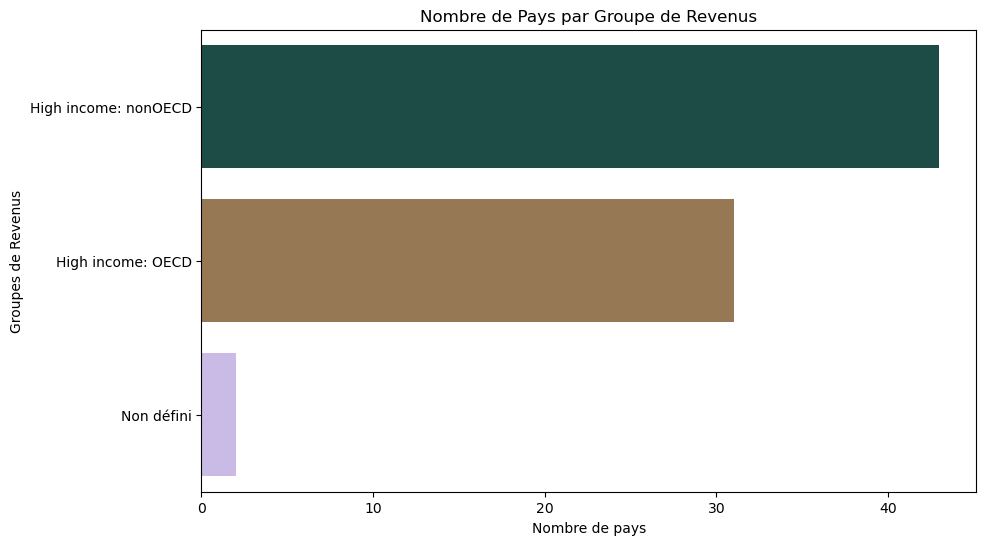

In [38]:
GraphGroupRevenus(data_merge_liste_income)

In [40]:
def SuppressionColonne(data):
    del data['Lending category']
    del data['SNA price valuation']
    del data['Other groups']
    del data['System of National Accounts']
    del data['Alternative conversion factor']
    del data['PPP survey year']
    del data['Balance of Payments Manual in use']
    del data['External debt Reporting status']
    del data['System of trade']
    del data['Government Accounting concept']
    del data['IMF data dissemination standard']
    del data['Latest population census']
    del data['Latest household survey']
    del data['Source of most recent Income and expenditure data']
    del data['Vital registration complete']
    del data['Latest agricultural census']
    del data['WB-2 code']
    del data['National accounts base year']
    del data['National accounts reference year']     
    del data['Latest industrial data']
    del data['Latest trade data']
    del data['Latest water withdrawal data']    

In [41]:
SuppressionColonne(data_merge_liste_income)

In [49]:
def TopIndicatorParYear(data, indicator):
    data_indicator_annee = data.copy()
    
    # Filtrer sur tes indicateurs
    data_indicator_annee_filtered = data_indicator_annee[data_indicator_annee['Indicator Code'].isin(liste_codeindicator)]
    
    # Dictionnaires pour stocker les résultats
    top10_last_year = {}
    top10_mean_years = {}
    
    for code in liste_codeindicator:
        data_indic = data_indicator_annee_filtered[data_indicator_annee_filtered['Indicator Code'] == code]
    
        # --- Top 10 sur la dernière année disponible ---
        last_year = max(map(int, annees_20052015))  # ex: 2015
        if str(last_year) in data_indic.columns:
            top10_last_year[code] = (
                data_indic[['Short Name', str(last_year)]]
                .dropna()
                .sort_values(by=str(last_year), ascending=False)
                .head(20)
            )
    
        # --- Top 10 sur la moyenne des années disponibles ---
        top10_mean_years[code] = (
            data_indic.set_index('Short Name')[annees_20052015]
            .mean(axis=1, skipna=True)
            .sort_values(ascending=False)
            .head(20)
            .reset_index(name='Moyenne')
        )
    
    # Exemple d'affichage : Top 10 pour un indicateur
    print('== Top 10 sur la dernière année disponible ==')
    print(top10_last_year[indicator])
    
    print('\n== Top 10 sur la moyenne des années ==')
    print(top10_mean_years[indicator])

In [50]:
print('\n------------- Indicateur SP.POP.TOTL -------------')
TopIndicatorParYear(data_merge_liste_income, 'SP.POP.TOTL')
print('\n------------- Indicateur SP.POP.GROW -------------')
TopIndicatorParYear(data_merge_liste_income, 'SP.POP.GROW')
print('\n------------- Indicateur SP.POP.1524.TO.UN -------------')
TopIndicatorParYear(data_merge_liste_income, 'SP.POP.1524.TO.UN')
print('\n------------- Indicateur NY.GNP.PCAP.PP.CD -------------')
TopIndicatorParYear(data_merge_liste_income, 'NY.GNP.PCAP.PP.CD')
print('\n------------- Indicateur NY.GDP.MKTP.PP.CD -------------')
TopIndicatorParYear(data_merge_liste_income, 'NY.GDP.MKTP.PP.CD')
print('\n------------- Indicateur SE.SEC.ENRR -------------')
TopIndicatorParYear(data_merge_liste_income, 'SE.SEC.ENRR')
print('\n------------- Indicateur SE.TER.ENRR -------------')
TopIndicatorParYear(data_merge_liste_income, 'SE.TER.ENRR')
print('\n------------- Indicateur IT.NET.USER.P2 -------------')
TopIndicatorParYear(data_merge_liste_income, 'IT.NET.USER.P2')


------------- Indicateur SP.POP.TOTL -------------
== Top 10 sur la dernière année disponible ==
           Short Name         2015
81976   United States  320896618.0
63484          Russia  144096870.0
38560           Japan  127141000.0
28510         Germany   81686611.0
26500          France   66624068.0
81574  United Kingdom   65128861.0
37756           Italy   60730582.0
40972           Korea   51014947.0
70720           Spain   46447697.0
61474          Poland   37986412.0
14038          Canada   35848610.0
65494    Saudi Arabia   31557144.0
4390        Australia   23789338.0
15646           Chile   17762681.0
55042     Netherlands   16939923.0
7606          Belgium   11274196.0
29716          Greece   10820883.0
20470  Czech Republic   10546059.0
61876        Portugal   10358076.0
74338          Sweden    9799186.0

== Top 10 sur la moyenne des années ==
        Short Name       Moyenne
0    United States  3.087880e+08
1           Russia  1.432124e+08
2            Japan  1.277393

In [51]:
# Modifie le dataframe pour le présenter sous une autre forme.

data_aconstruire = data_merge_liste_income.copy()
data_wide = (
    data_aconstruire.melt(
        id_vars=['Short Name', 'Indicator Code'], 
        value_vars=annees_20052015, 
        var_name='Year', 
        value_name='Value'
    )
    .groupby(['Short Name', 'Indicator Code'])['Value']
    .mean()
    .reset_index()
    .pivot(index='Short Name', columns='Indicator Code', values='Value')
)
print(data_wide.shape)
data_wide.head(10)

(76, 8)


Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL
Short Name,,,,,,,,
Andorra,76.475185,NaN,NaN,NaN,NaN,8.589500e+03,0.208632,8.177455e+04
Antigua and Barbuda,48.107273,1.923597e+09,19612.727273,105.600807,17.224153,1.346350e+04,1.128608,9.461573e+04
Aruba,59.149202,3.671232e+09,NaN,98.902163,29.894695,1.357318e+04,0.501860,1.020465e+05
Australia,75.533792,8.932081e+11,38960.909091,133.922543,79.264152,2.893898e+06,1.519595,2.202987e+07
Austria,74.253159,3.623328e+11,43181.818182,99.368819,65.388568,9.985681e+05,0.499110,8.390539e+06
Bahrain,61.944466,4.948954e+10,38127.272727,95.384613,36.857870,1.260156e+05,4.569787,1.184191e+06
Barbados,65.270000,4.571522e+09,15627.272727,105.291528,67.676652,4.079491e+04,0.363027,2.793503e+05
Belgium,73.230281,4.364025e+11,40486.363636,122.739548,67.396297,1.257487e+06,0.715277,1.089967e+07
Bermuda,84.501475,3.532134e+09,69881.428571,76.010968,28.733789,7.102000e+03,0.212298,6.493955e+04


In [45]:
# On supprime les pays dont les indicateurs n'ont pas de valeurs.

data_wide_temp = data_wide.copy()
data_wide_full_data = data_wide_temp.dropna(how="any")

print(data_wide.shape)           # dimensions avant nettoyage
print(data_wide_full_data.shape)  # dimensions après nettoyage

# Affiche un aperçu
data_wide_full_data.head(50)

(76, 8)
(48, 8)


Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL
Short Name,,,,,,,,
Antigua and Barbuda,48.107273,1.923597e+09,19612.727273,105.600807,17.224153,1.346350e+04,1.128608,9.461573e+04
Australia,75.533792,8.932081e+11,38960.909091,133.922543,79.264152,2.893898e+06,1.519595,2.202987e+07
Austria,74.253159,3.623328e+11,43181.818182,99.368819,65.388568,9.985681e+05,0.499110,8.390539e+06
Bahrain,61.944466,4.948954e+10,38127.272727,95.384613,36.857870,1.260156e+05,4.569787,1.184191e+06
Barbados,65.270000,4.571522e+09,15627.272727,105.291528,67.676652,4.079491e+04,0.363027,2.793503e+05
Belgium,73.230281,4.364025e+11,40486.363636,122.739548,67.396297,1.257487e+06,0.715277,1.089967e+07
Bermuda,84.501475,3.532134e+09,69881.428571,76.010968,28.733789,7.102000e+03,0.212298,6.493955e+04
Brunei,53.825073,3.101746e+10,79388.181818,99.413604,20.041946,7.271827e+04,1.360064,3.900619e+05
Chile,46.921064,3.220914e+11,17662.727273,96.931690,68.658668,2.887608e+06,0.965011,1.697690e+07


In [46]:
# Calcule de la moyenne de la population totale dans data_wide_full_data
data_wide_full_data_temp = data_wide_full_data.copy()
mean_population = data_wide_full_data_temp["SP.POP.TOTL"].mean()

# Filtre les pays dont la population est supérieure à cette moyenne
data_final = data_wide_full_data_temp[data_wide_full_data_temp["SP.POP.TOTL"] > mean_population]

print("Moyenne de population totale :", mean_population)
print(data_final.shape)
data_final.head(20)

Moyenne de population totale : 25090086.763257578
(11, 8)


Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL
Short Name,,,,,,,,
France,71.363118,2.362061e+12,36945.454545,111.478909,57.687309,7.655038e+06,0.551149,6.498942e+07
Germany,79.690891,3.287462e+12,41110.909091,103.019220,64.931936,9.329035e+06,-0.091866,8.153792e+07
Italy,49.389045,2.071158e+12,34838.181818,101.136694,65.106023,5.811026e+06,0.467678,5.931128e+07
Japan,78.950104,4.576502e+12,36878.181818,101.281577,59.044125,1.285234e+07,-0.044224,1.277393e+08
Korea,82.409507,1.487008e+12,29976.363636,97.323592,95.062117,6.667012e+06,0.538182,4.959547e+07
Poland,57.101472,7.907302e+11,20158.181818,99.593989,69.192955,5.323013e+06,-0.046741,3.808293e+07
Russia,43.767268,2.991644e+12,20061.818182,90.906941,75.956141,1.994313e+07,0.001881,1.432124e+08
Saudi Arabia,43.044953,1.300500e+12,47514.545455,97.633682,41.427442,4.894137e+06,2.785484,2.757883e+07
Spain,64.052236,1.480146e+12,31760.909091,123.972306,78.563771,4.677938e+06,0.717680,4.593051e+07


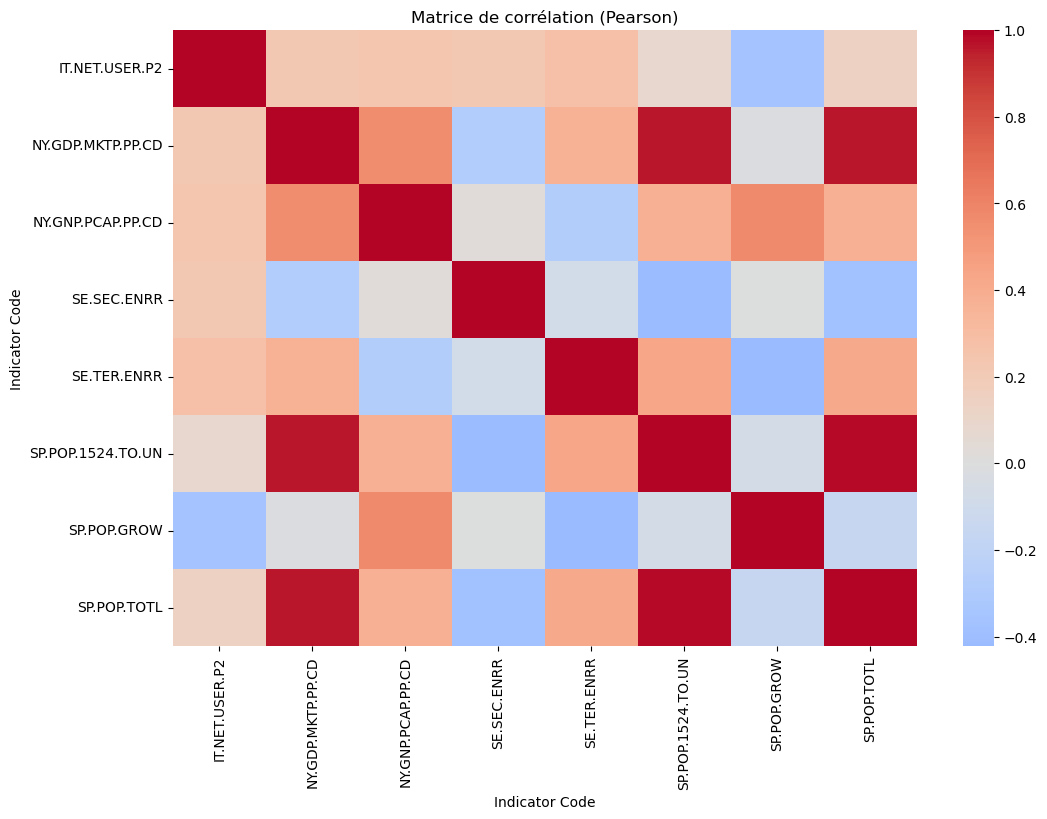

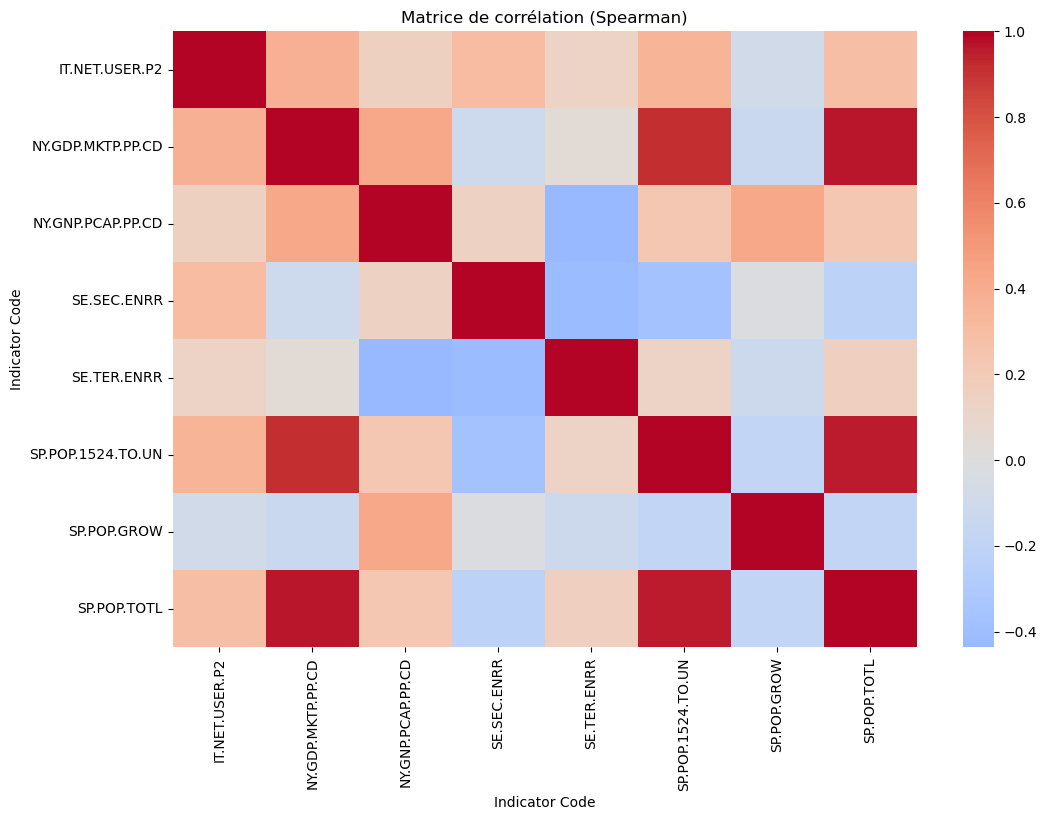

In [52]:
# Corrélation Pearson
corr_pearson = data_final.corr(method="pearson")

# Corrélation Spearman
corr_spearman = data_final.corr(method="spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_pearson, cmap="coolwarm", center=0, annot=False)
plt.title("Matrice de corrélation (Pearson)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, cmap="coolwarm", center=0, annot=False)
plt.title("Matrice de corrélation (Spearman)")
plt.show()